In [1]:
library(aod)
library(ggplot2)

### Examples

### Description of the data

In [2]:
mydata <- read.csv("./datasets/binary.csv")

## view the first few rows of the data
head(mydata)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [3]:
summary(mydata)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [4]:
sapply(mydata, sd)

admit         gre         gpa        rank 
  0.4660867 115.5165364   0.3805668   0.9444602

In [5]:
## two-way contingency table of categorical outcome and predictors we want
## to make sure there are not 0 cells
xtabs(~admit + rank, data = mydata)

     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12

### Analysis methods you might consider

### Using the logit model

In [6]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank, data = mydata, family = "binomial")

In [7]:
summary(mylogit)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


In [8]:
## CIs using profiled log-likelihood
confint(mylogit)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-6.2716202334,-1.792547080
gre,0.0001375921,0.004435874
gpa,0.1602959439,1.464142727
rank2,-1.3008888002,-0.056745722
rank3,-2.0276713127,-0.670372346
rank4,-2.4000265384,-0.753542605


In [9]:
## CIs using standard errors
confint.default(mylogit)

,2.5 %,97.5 %
(Intercept),-6.2242418514,-1.755716295
gre,0.0001202298,0.004408622
gpa,0.1536836760,1.454391423
rank2,-1.2957512650,-0.055134591
rank3,-2.0169920597,-0.663415773
rank4,-2.3703986294,-0.732528724


In [10]:
wald.test(b = coef(mylogit), Sigma = vcov(mylogit), Terms = 4:6)

Wald test:
----------

Chi-squared test:
X2 = 20.9, df = 3, P(> X2) = 0.00011

In [11]:
l <- cbind(0, 0, 0, 1, -1, 0)
wald.test(b = coef(mylogit), Sigma = vcov(mylogit), L = l)

Wald test:
----------

Chi-squared test:
X2 = 5.5, df = 1, P(> X2) = 0.019

In [12]:
## odds ratios only
exp(coef(mylogit))

(Intercept)         gre         gpa       rank2       rank3       rank4 
  0.0185001   1.0022670   2.2345448   0.5089310   0.2617923   0.2119375

In [13]:
## odds ratios and 95% CI
exp(cbind(OR = coef(mylogit), confint(mylogit)))

Waiting for profiling to be done...


,OR,2.5 %,97.5 %
(Intercept),0.0185001,0.001889165,0.1665354
gre,1.0022670,1.000137602,1.0044457
gpa,2.2345448,1.173858216,4.3238349
rank2,0.5089310,0.272289674,0.9448343
rank3,0.2617923,0.131641717,0.5115181
rank4,0.2119375,0.090715546,0.4706961


In [14]:
newdata1 <- with(mydata, data.frame(gre = mean(gre), gpa = mean(gpa), rank = factor(1:4)))

## view data frame
newdata1

gre,gpa,rank
587.7,3.3899,1
587.7,3.3899,2
587.7,3.3899,3
587.7,3.3899,4


In [15]:
newdata1$rankP <- predict(mylogit, newdata = newdata1, type = "response")
newdata1

gre,gpa,rank,rankP
587.7,3.3899,1,0.5166016
587.7,3.3899,2,0.3522846
587.7,3.3899,3,0.2186120
587.7,3.3899,4,0.1846684


In [16]:
newdata2 <- with(mydata, data.frame(gre = rep(seq(from = 200, to = 800, length.out = 100),4), 
                                    gpa = mean(gpa), rank = factor(rep(1:4, each = 100))))

In [17]:
newdata3 <- cbind(newdata2, predict(mylogit, newdata = newdata2, type = "link", se = TRUE))

newdata3 <- within(newdata3, {
            PredictedProb <- plogis(fit)
            LL <- plogis(fit - (1.96 * se.fit))
            UL <- plogis(fit + (1.96 * se.fit))  })

## view first few rows of final dataset
head(newdata3)

gre,gpa,rank,fit,se.fit,residual.scale,UL,LL,PredictedProb
200.0000,3.3899,1,-0.8114870,0.5147714,1,0.5492064,0.1393812,0.3075737
206.0606,3.3899,1,-0.7977632,0.5090986,1,0.5498513,0.1423880,0.3105042
212.1212,3.3899,1,-0.7840394,0.5034491,1,0.5505074,0.1454429,0.3134499
218.1818,3.3899,1,-0.7703156,0.4978239,1,0.5511750,0.1485460,0.3164108
224.2424,3.3899,1,-0.7565919,0.4922237,1,0.5518545,0.1516973,0.3193867
230.3030,3.3899,1,-0.7428681,0.4866494,1,0.5525464,0.1548966,0.3223773


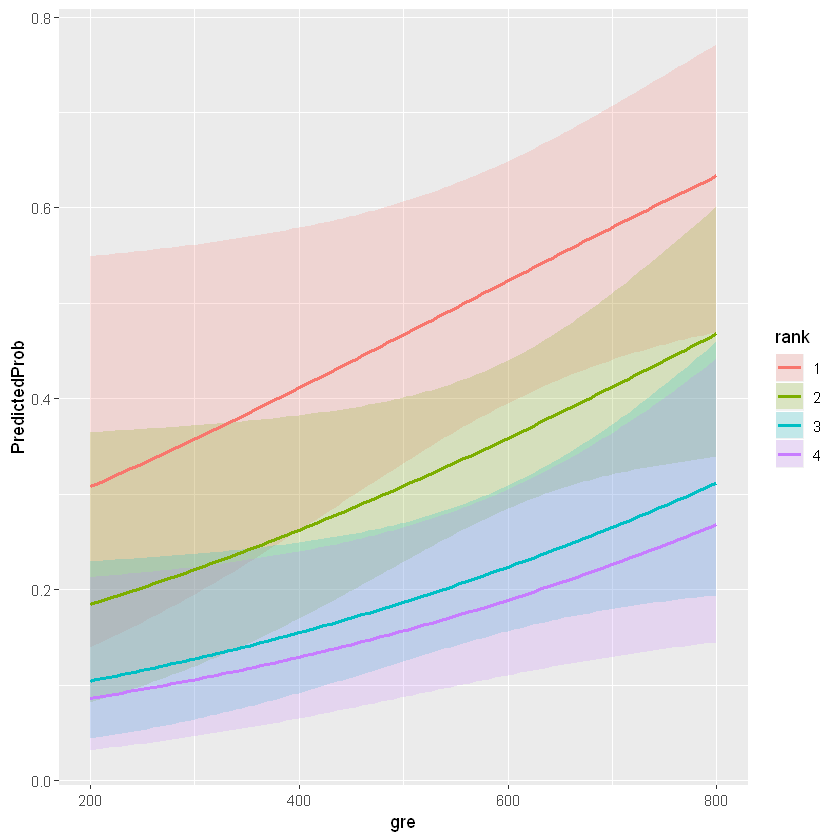

In [18]:
ggplot(newdata3, aes(x = gre, y = PredictedProb)) + 
    geom_ribbon(aes(ymin = LL, ymax = UL, fill = rank), alpha = 0.2) + geom_line(aes(colour = rank), size = 1)

In [19]:
with(mylogit, null.deviance - deviance)

[1] 41.45903

In [20]:
with(mylogit, df.null - df.residual)

[1] 5

In [21]:
with(mylogit, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 7.578194e-08

In [22]:
logLik(mylogit)

'log Lik.' -229.2587 (df=6)

### Things to consider